In [1]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hh.csv')

In [3]:
df.head(2)

,name,area,salary,published_at,employer,professional_roles,experience,schedule,employment,key_skills,description
0,Аналитик данных (Удаленно),Казань,NaN,2023-10-30T10:13:13+0300,Miles&Miles,"['BI-аналитик, аналитик данных']",Нет опыта,Удаленная работа,Полная занятость,"['Power BI', 'Аналитические исследования', 'Ра...","Привет! Мы - команда молодых специалистов, кот..."
1,Frontend-разработчик (React),Пермь,NaN,2023-10-26T16:37:53+0300,Форсайт,"['Программист, разработчик']",От 1 года до 3 лет,Гибкий график,Полная занятость,"['JavaScript', 'Redux', 'React', 'Scrum', 'CSS...",Компания &quot;Форсайт&quot; будет рада видеть...


### Набор данных: ###
 - Вакансии аналитика со всей России за последний месяц

In [4]:
df.shape, df.isnull().sum()

((2000, 11),
 name                     0
 area                     0
 salary                1590
 published_at             0
 employer                 0
 professional_roles       0
 experience               0
 schedule                 0
 employment               0
 key_skills             663
 description              0
 dtype: int64)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                2000 non-null   object
 1   area                2000 non-null   object
 2   salary              410 non-null    object
 3   published_at        2000 non-null   object
 4   employer            2000 non-null   object
 5   professional_roles  2000 non-null   object
 6   experience          2000 non-null   object
 7   schedule            2000 non-null   object
 8   employment          2000 non-null   object
 9   key_skills          1337 non-null   object
 10  description         2000 non-null   object
dtypes: object(11)
memory usage: 172.0+ KB


- Зарплата известна меньше, чем у четверти вакансий
- Графа основных скиллов отсутствует у трети данных
- Остальные столбцы являются обязательными для заполнения, так что работа с ними будет простой

## DATA VISUALIZATION ##

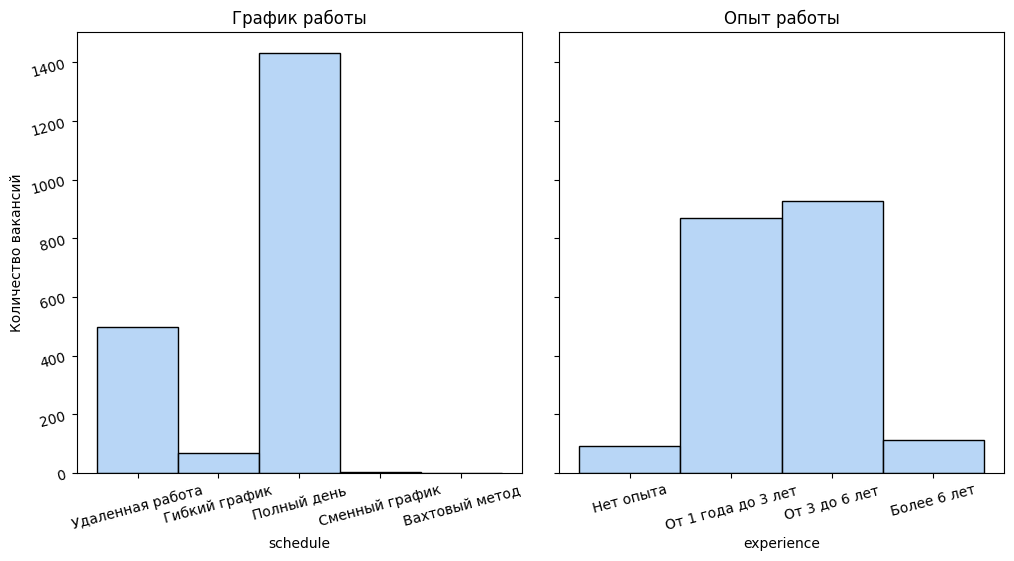

In [7]:
sns.set_palette("pastel")
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.tight_layout()

sns.histplot(df.schedule, ax=ax[0]);
sns.histplot(df.experience, ax=ax[1]);

ax[0].tick_params(labelrotation=15)
ax[1].tick_params(labelrotation=15)
ax[0].set_ylabel('Количество вакансий');

ax[0].set_title('График работы');
ax[1].set_title('Опыт работы');

In [8]:
vacancies = pd.DataFrame({'Опыт' : df.experience.value_counts().index.values, 'Количество вакансий' : df.experience.value_counts().values})
vac_sum = np.sum(vacancies['Количество вакансий'])
vacancies['%'] = round(vacancies['Количество вакансий'] / vac_sum * 100)
vacancies

,Опыт,Количество вакансий,%
0,От 3 до 6 лет,928,46.0
1,От 1 года до 3 лет,868,43.0
2,Более 6 лет,111,6.0
3,Нет опыта,93,5.0


In [10]:
schedule = pd.DataFrame({'Опыт' : df.schedule.value_counts().index.values, 'Количество вакансий' : df.schedule.value_counts().values})
sch_sum = np.sum(vacancies['Количество вакансий'])
schedule['%'] = round(schedule['Количество вакансий'] / sch_sum * 100)
schedule

,Опыт,Количество вакансий,%
0,Полный день,1431,72.0
1,Удаленная работа,497,25.0
2,Гибкий график,68,3.0
3,Сменный график,3,0.0
4,Вахтовый метод,1,0.0


- Для большиства вакансий требуется опыт 'от 1 года до 3 лет' или 'от 3 до 6 лет'
- Часто в графе "требуемый опыт" работадатель указывает "Нет опыта" и прописывает требуемый опыт уже в описании вакансии. Учитывая это, получаем, что очень мало вакансий действительно открыто для начинающих специалистов.
- В четверти вакансий возможна удаленная работа, однако большиство вакансий предполагают полный рабочий день

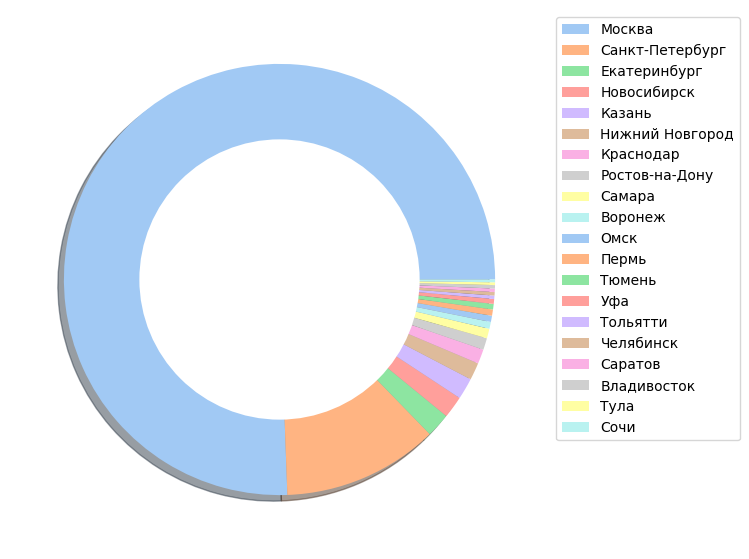

In [11]:
plt.figure(figsize=(10,7))
plt.pie(df.area.value_counts()[:20], shadow=True);
plt.legend(labels=df.area.value_counts()[:20].index.tolist(), bbox_to_anchor=(1,1));

hole = plt.Circle((0, 0), 0.65, facecolor='white');
plt.gcf().gca().add_artist(hole);

Около 90% вакансий были открыты для городов Москва и Санкт-Петербург, всего в данных 63 города

In [12]:
# Создадим отдельные признаки для дня недели и времени публикации
df['published_date'] = pd.to_datetime(df.published_at).dt.date
df['published_time'] = pd.to_datetime(df.published_at).dt.hour
df['published_weekday'] = pd.to_datetime(df.published_at).dt.weekday
df.drop('published_at', axis=1, inplace=True)

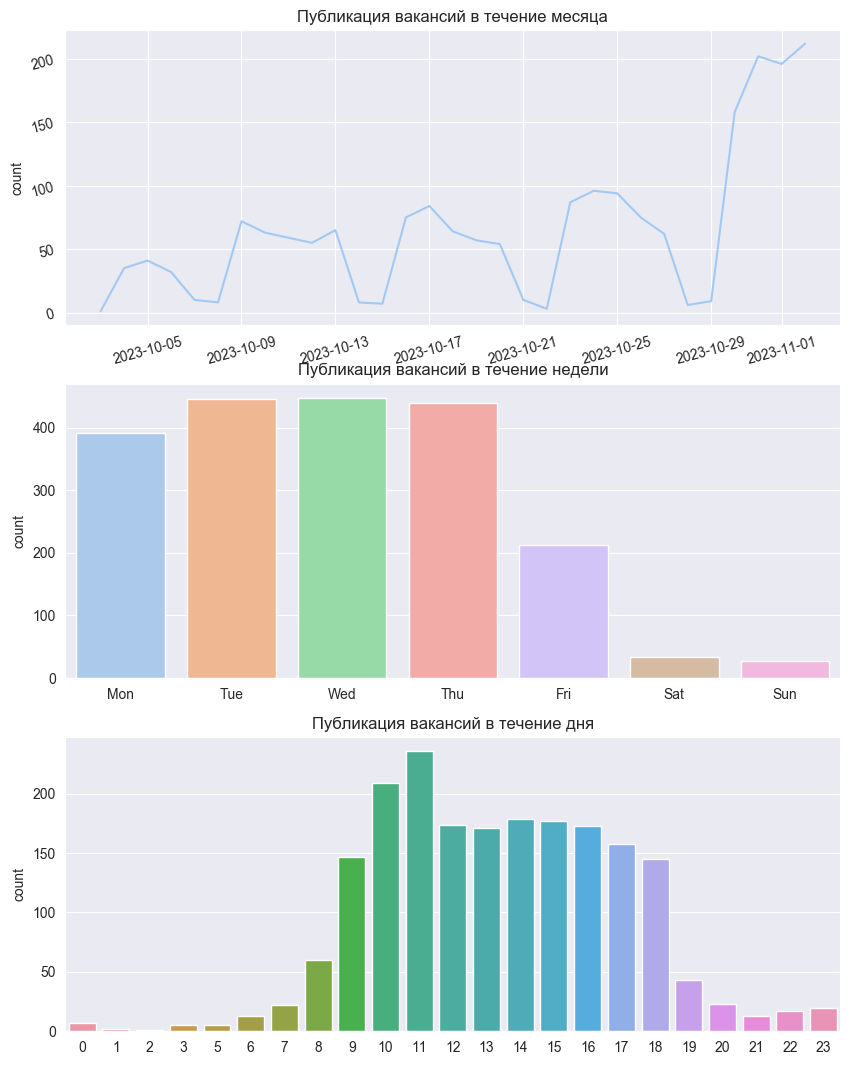

In [13]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(3, 1, figsize=(10,13))

sns.lineplot(x=df.published_date.value_counts().index.tolist(), y=df.published_date.value_counts(), ax=ax[0]);
ax[0].tick_params(labelrotation=15)

sns.barplot(x=df.published_weekday.value_counts().index.tolist(), y=df.published_weekday.value_counts(), ax=ax[1]);
ax[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);

sns.barplot(x=df.published_time.value_counts().index.tolist(), y=df.published_time.value_counts(), ax=ax[2]);

ax[0].set_title('Публикация вакансий в течение месяца');
ax[1].set_title('Публикация вакансий в течение недели');
ax[2].set_title('Публикация вакансий в течение дня');

#### Выводы: ####
- Количество публикуемых вакансий сильно увеличилось к концу месяца
- В рабочие дни публикуется практически одинаковое количество вакансий, однако в выходные дни это число сильно меньше, что и объясняет форму 30-дневного графика
- Вакансии публикуются в рабочее время, в остальные часы число публикаций близко к нулю

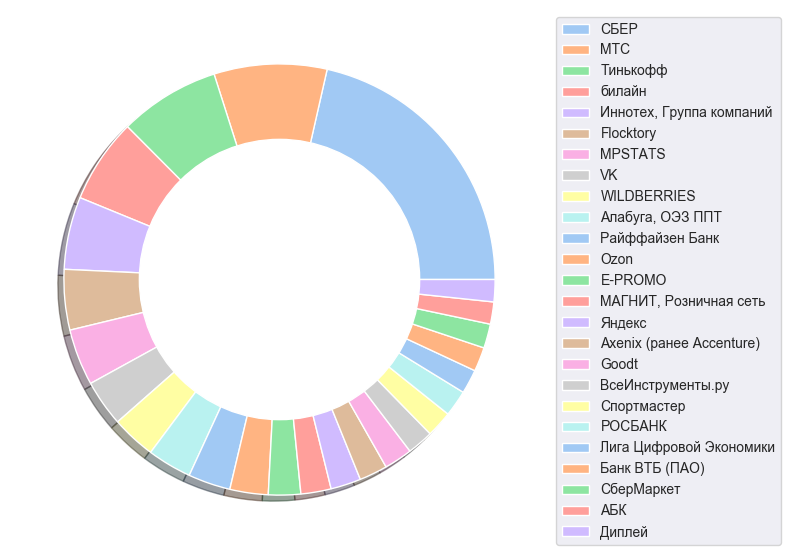

In [14]:
plt.figure(figsize=(10,7))
plt.pie(df.employer.value_counts()[:25], shadow=True);
plt.legend(labels=df.employer.value_counts()[:25].index.tolist(), bbox_to_anchor=(1,1));

hole = plt.Circle((0, 0), 0.65, facecolor='white');
plt.gcf().gca().add_artist(hole);

- Самыми частыми работадателями оказываются ведущие ИТ-компании, а также интернет-банки и сети магазинов.

### Посмотрим на распределение зарплат ###

In [15]:
df['salary'].fillna(0, inplace=True) #для правильной работы ast.literal_eval(), в дальнейшем эти данные учитываться не будут

In [16]:
df['salary_from'] = [ast.literal_eval(df.salary[i])['from'] if df.salary[i] != 0 else 0 for i in range(df.shape[0])]
df['salary_to'] = [ast.literal_eval(df.salary[i])['to'] if df.salary[i] != 0 else 0 for i in range(df.shape[0])]
df['salary_currency'] = [ast.literal_eval(df.salary[i])['currency'] if df.salary[i] != 0 else 'RUR' for i in range(df.shape[0])]
df.drop('salary', axis=1, inplace=True)

Нижняя и верхняя границы зарплаты, валюта

In [17]:
df[['salary_from', 'salary_to', 'salary_currency']].isnull().sum()

salary_from        104
salary_to          145
salary_currency      0
dtype: int64

 - Для 104 вакансий неизвестна верхняя граница, для 145 - нижняя

In [18]:
df[df['salary_currency'] != 'RUR']['salary_currency'].unique()

array(['USD'], dtype=object)

Помимо рубля встречается только USD, переведем в рубли для удобства

In [19]:
df.loc[df.salary_currency != 'RUR', 'salary_to'] = df[df.salary_currency != 'RUR'].salary_to * 95
df.loc[df.salary_currency != 'RUR', 'salary_from'] = df[df.salary_currency != 'RUR'].salary_from * 95
df.loc[df.salary_currency != 'RUR', 'salary_currency'] = 'RUR'

In [20]:
salary_df = df[(df['salary_to'] > 0) & (df['salary_from'] > 0)]

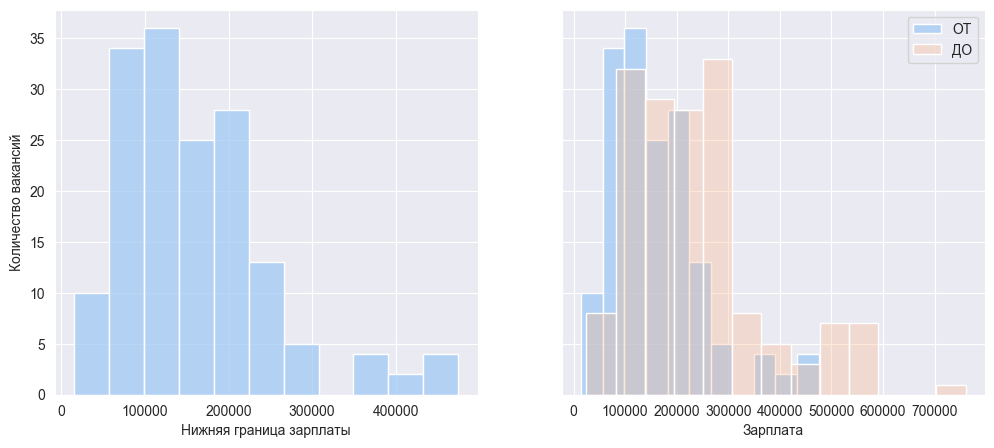

In [21]:
fig, ax= plt.subplots(1, 2, figsize=(12,5), sharey=True)

sns.histplot(salary_df.salary_from, ax=ax[0]);

sns.histplot(salary_df.salary_from, label='ОТ', ax=ax[1]);
sns.histplot(salary_df.salary_to, label='ДО', alpha=0.3, ax=ax[1]);

ax[0].set_xlabel('Нижняя граница зарплаты')
ax[0].set_ylabel('Количество вакансий')

ax[1].set_xlabel('Зарплата')
plt.legend();

In [22]:
avg_dif = round(np.median(salary_df['salary_from'] / salary_df['salary_to']), 2)
avg_dif

0.67

- В среднем, Нижняя Граница = Верхняя граница * 0.67
- Подставим это для зарплат с одной известной

In [23]:
df.loc[(df['salary_from'].isnull()) & (df['salary_to'].isnull() == False), 'salary_from'] = df['salary_to'] * 0.67
df.loc[(df['salary_to'].isnull()) & (df['salary_from'].isnull() == False), 'salary_to'] = df['salary_from'] / 0.67

In [24]:
df[['salary_from', 'salary_to', 'salary_currency']].isnull().sum()

salary_from        0
salary_to          0
salary_currency    0
dtype: int64

- Обновим dataframe известных зарплат

In [25]:
salary_df = df[(df['salary_to'] > 0) & (df['salary_from'] > 0)]

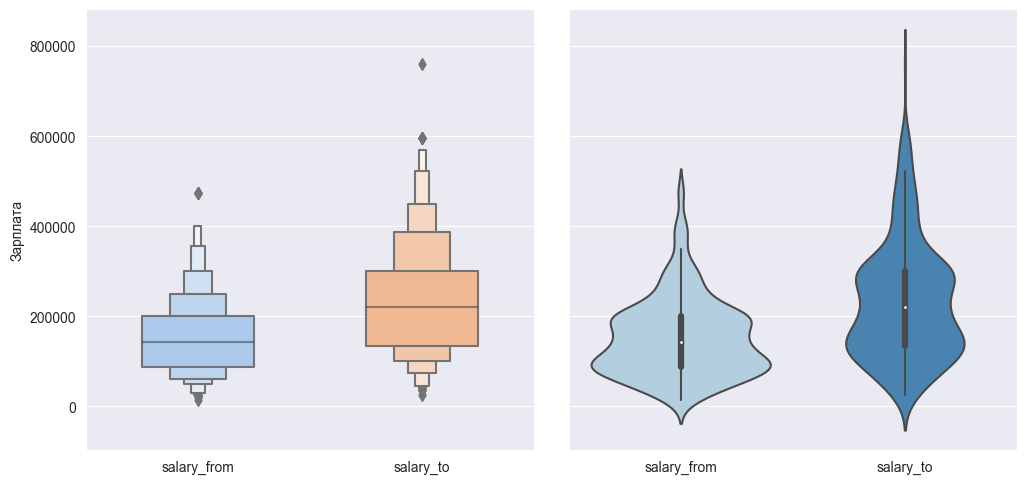

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), sharey=True)
fig.tight_layout()

sns.boxenplot(data=salary_df[['salary_from', 'salary_to']], width=0.5, ax=ax[0]);
sns.violinplot(data=salary_df[['salary_from', 'salary_to']], ax=ax[1], palette='Blues');

ax[0].set_ylabel('Зарплата');

- Видно, что выбросы на одной из границ произошли из-за того, что посчитаны эти значения были простым умножением.
Скорее всего, для таких выбросов настоящая граница лучше бы вписывалась в распределение.
- И для верхней и для нижней границы большинство значений не превышает 300 тысяч

Для отображения зависимости зарплаты и других признаков на графике введем значение зарплаты, находящейся посредине между верхней и нижней границей.

In [30]:
salary_df['avg_salary'] = (salary_df.salary_from + salary_df.salary_to) / 2

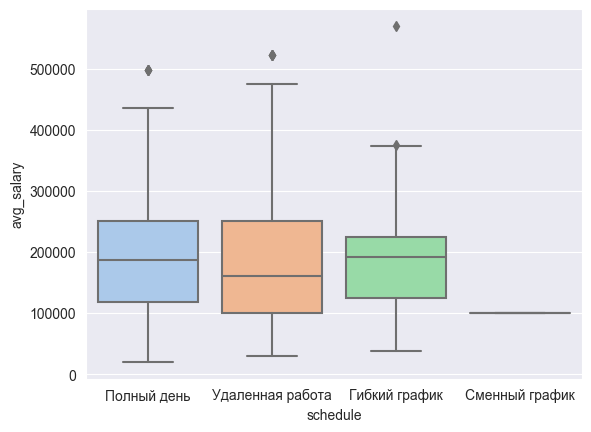

In [31]:
sns.boxplot(x=salary_df.schedule, y=salary_df.avg_salary);

- Удаленная работа в среднем оплачивается чуть хуже работы в офисе, однако у нее и больше разброс
- Такой результат может быть обусловлен тем, что компании платят меньше за удаленную работу, однако сюда же входят и международные компании, зарплата которых в пересчете на рубли и создает такие выбросы

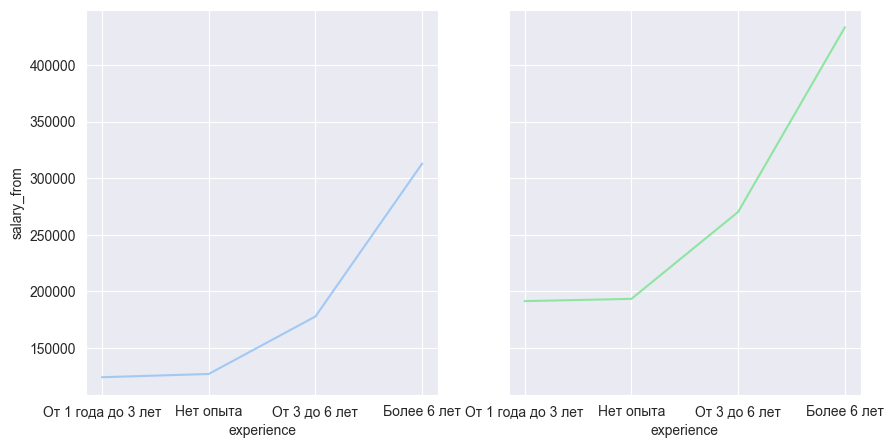

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
sns.lineplot(data=salary_df.pivot_table(index='experience', values='salary_from').sort_values(by='salary_from'),
            x="experience", y="salary_from",color="C0", ax=ax[0]);
sns.lineplot(data=salary_df.pivot_table(index='experience', values='salary_to').sort_values(by='salary_to'),
            x="experience", y="salary_to",color="C2", ax=ax[1]);
ax[0].grid(True);
ax[1].grid(True);

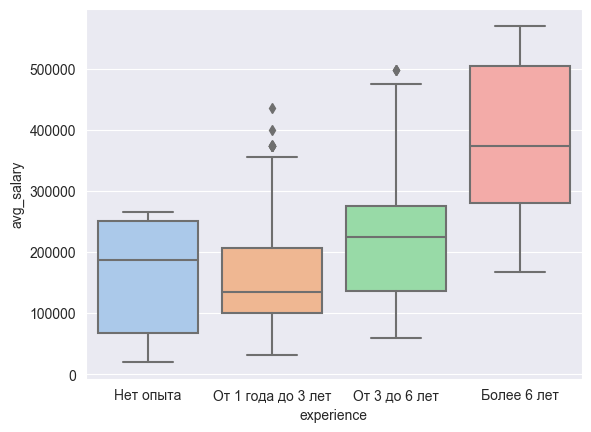

In [33]:
sns.boxplot(x=salary_df.experience, y=salary_df.avg_salary);

- Большой разброс вакансий без опыта, произошедший, опять же, из-за того что требуемый опыт иногда указывают только в описании вакансии, оставляя в этой строке "без опыта", из-за чего сюда взодят и зарплаты специалистов с опытом
- Еще больший разброс вакансий с опытом > 6 лет. Обусловлен теми же вакансиями с зарплатой не в рублях, а также в целом ценностью кандидата с таким опытом

## Анализ текстовых данных ##

In [34]:
import re

# Находим отсортированное количество вхождений слов в данную характеристику
def find_freq(df, col):
    freq_df = df[col].to_list()
    freqs = []
    
    for freq in freq_df:
        for el in str(freq)[1:-1].split(','):
            freqs.append((''.join(filter(str.isalpha, el))).capitalize())

    set_freqs = set(freqs)
    dct_freqs = {el:freqs.count(el) for el in set_freqs}
    
    srt_freqs = dict(sorted(dct_freqs.items(), key=lambda x: x[1], reverse=True))

    return pd.Series(srt_freqs, name=col)

In [35]:
df['professional_roles'] = [ast.literal_eval(df.professional_roles[i]) for i in range(df.shape[0])]

In [36]:
most_freq_roles = find_freq(df, 'professional_roles')

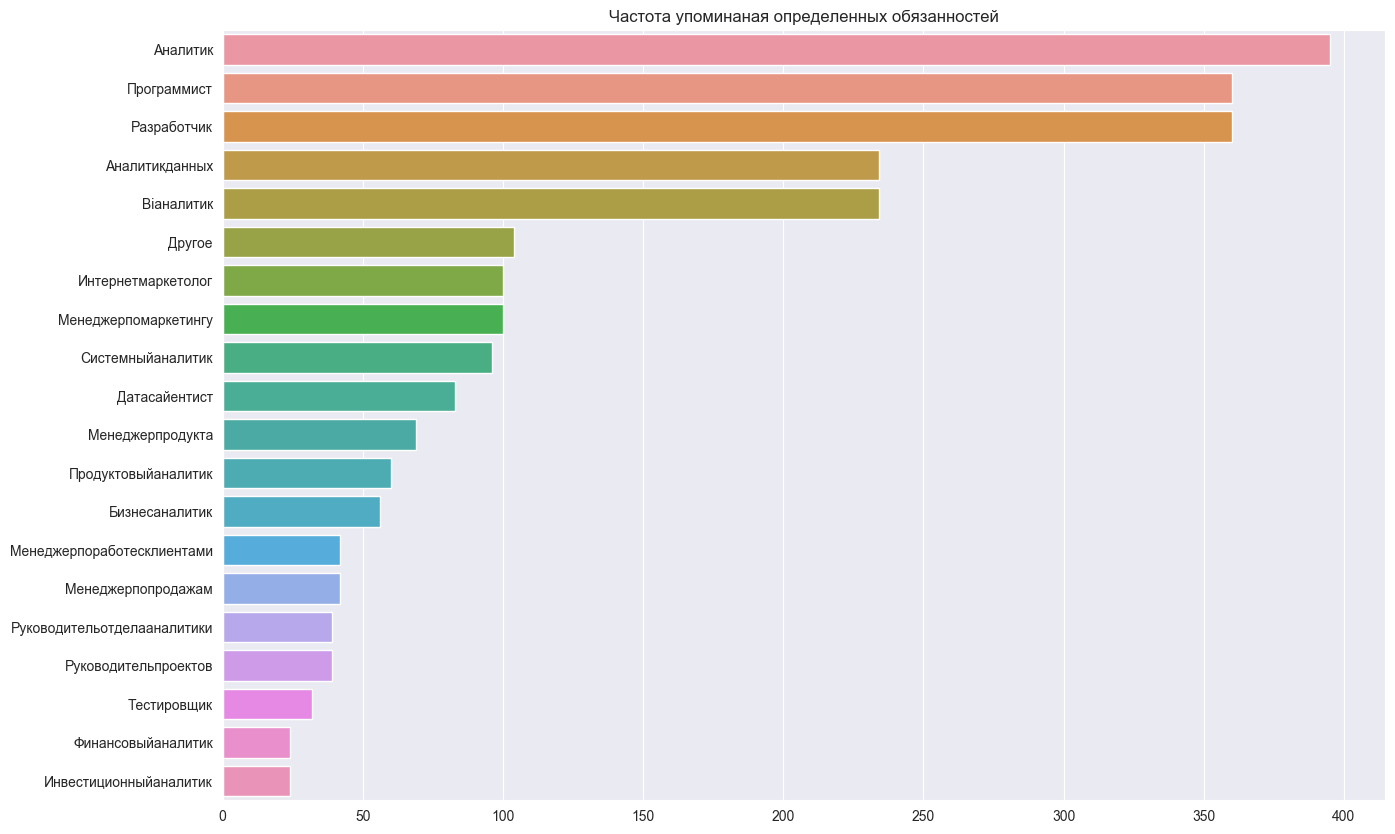

In [37]:
plt.figure(figsize=(15,10))
sns.barplot(y=most_freq_roles[:20].index.tolist(), x=most_freq_roles[:20].values, orient='h');
plt.title('Частота упоминаная определенных обязанностей');

In [38]:
pd.DataFrame({'role' : most_freq_roles[:10].index.tolist(), 'count' : most_freq_roles[:10].values})

,role,count
0,Аналитик,395
1,Программист,360
2,Разработчик,360
3,Аналитикданных,234
4,Biаналитик,234
5,Другое,104
6,Интернетмаркетолог,100
7,Менеджерпомаркетингу,100
8,Системныйаналитик,96
9,Датасайентист,83


Помимо аналитики, обязанностями часто являются разработка, программирование, визуализация, управление, тестирование

In [39]:
# Данный признак не заполнен у 663 вакансий
skill_df = df[df['key_skills'].isnull() == False].reset_index()
skill_df.key_skills = [ast.literal_eval(skill_df.key_skills[i]) for i in range(skill_df.shape[0])]

In [40]:
most_freq_skill = find_freq(skill_df, 'key_skills')

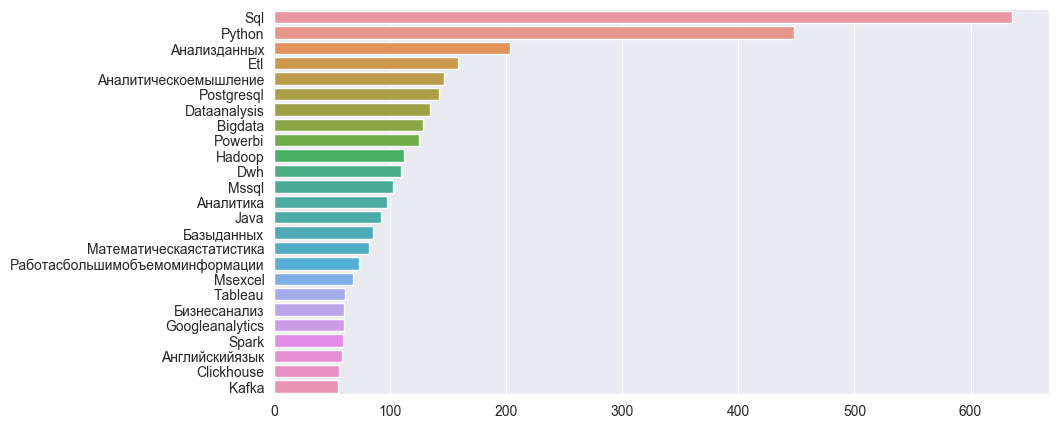

In [41]:
plt.figure(figsize=(10,5))
sns.barplot(y=most_freq_skill[:25].index.tolist(), x=most_freq_skill[:25].values, orient='h');

In [42]:
pd.DataFrame({'skill' : most_freq_skill[:10].index.tolist(), 'count' : most_freq_skill[:10].values})

,skill,count
0,Sql,636
1,Python,448
2,Анализданных,203
3,Etl,158
4,Аналитическоемышление,146
5,Postgresql,142
6,Dataanalysis,134
7,Bigdata,128
8,Powerbi,125
9,Hadoop,112


Самые востребованные навыки аналитика, ожидаемо, python, sql, работа с bigdata, ПО для визуализации данных

In [44]:
def name(df):
    name_df = df['name'].to_list()
    names = []

    for name in name_df:
        for el in name.split(' '):
            str = re.sub(r'[\(\)]', '', el.lower())
            if str not in ['/', 'и', 'в', 'по']:
                names.append(str)

    set_names = set(names)
    dct_names = {el:names.count(el) for el in set_names}
    
    srt_names = dict(sorted(dct_names.items(), key=lambda x: x[1], reverse=True))

    return pd.Series(srt_names, name='name')

In [45]:
most_freq_names = name(df)

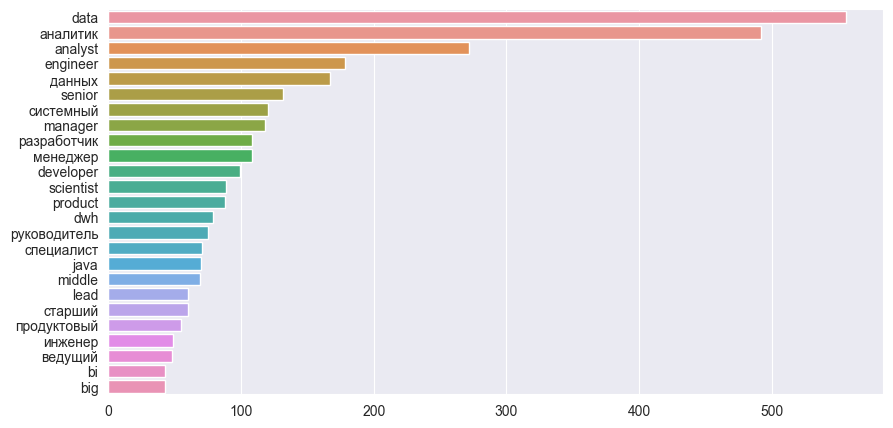

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(y=most_freq_names[:25].index.tolist(), x=most_freq_names[:25].values);

In [47]:
pd.DataFrame({'name' : most_freq_names[:10].index.tolist(), 'count' : most_freq_names[:10].values})

,name,count
0,data,556
1,аналитик,492
2,analyst,272
3,engineer,178
4,данных,167
5,senior,132
6,системный,120
7,manager,118
8,разработчик,108
9,менеджер,108


#### Посмотрим, как часто ожидаемый уровень кандидата прописан в вакансии ####

In [51]:
col = ['junior', 'middle', 'senior', 'старший', 'lead', 'младший']
level_df = pd.DataFrame({'skill' : most_freq_names.loc[col].index.tolist(), 'count' : most_freq_names.loc[col].values})

In [52]:
count_sum = np.sum(level_df['count'])
level_df['perc'] = round(level_df['count'] / count_sum * 100)
level_df.sort_values(by='perc').reset_index()

,index,skill,count,perc
0,5,младший,10,3.0
1,0,junior,40,11.0
2,3,старший,60,16.0
3,4,lead,60,16.0
4,1,middle,69,19.0
5,2,senior,132,36.0


Таким образом, чаще всего в названии вакансии указывают уровень senior

#### Посмотрим на самые частые слова в описании вакансии: ####

In [54]:
def top_description_words(df, word_length=2):
    lang = '[а-яА-Я]+'
    
    words_df = df['description'].to_list()
    words_ls = ' '.join([re.sub('quot', ' ', 
                         re.sub(' +', ' ', 
                         re.sub('\d+', '', 
                         el.strip().lower()))) 
                         for el in words_df])

    words_re = re.findall(lang, words_ls)
    words_l2 = [el for el in words_re if len(el) > word_length]
    words_st = set(words_l2)
    words_cnt = {el : words_l2.count(el) for el in words_st}
    return pd.Series(dict(sorted(words_cnt.items(), key=lambda x: x[1], reverse=True)))

In [55]:
top_ds_words = top_description_words(df, 3)

In [57]:
pd.DataFrame({'words' : top_ds_words[:30].index.tolist(), 'count' : top_ds_words[:30].values})

,words,count
0,опыт,6346
1,работы,6277
2,данных,5614
3,знание,2112
4,компании,1997
5,бизнес,1870
6,возможность,1565
7,разработки,1480
8,будет,1430
9,умение,1419
